In [21]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split

import math

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
train = df1.copy()
test = df2.copy()

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train.shape , test.shape

((381109, 12), (127037, 11))

#### Checking Duplicates in dataset

In [7]:
train.duplicated().sum() , test.duplicated().sum()

(0, 0)

#### checking Null Values

In [8]:
train.isna().sum() , test.isna().sum()

(id                      0
 Gender                  0
 Age                     0
 Driving_License         0
 Region_Code             0
 Previously_Insured      0
 Vehicle_Age             0
 Vehicle_Damage          0
 Annual_Premium          0
 Policy_Sales_Channel    0
 Vintage                 0
 Response                0
 dtype: int64,
 id                      0
 Gender                  0
 Age                     0
 Driving_License         0
 Region_Code             0
 Previously_Insured      0
 Vehicle_Age             0
 Vehicle_Damage          0
 Annual_Premium          0
 Policy_Sales_Channel    0
 Vintage                 0
 dtype: int64)

#### Checking data types

In [9]:
train.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
84768,84769,Male,48,1,48.0,1,1-2 Year,No,2630.0,15.0,226,0
113641,113642,Male,25,1,11.0,1,< 1 Year,No,35011.0,152.0,10,0


In [10]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
train.dtypes[train.dtypes == 'int64']

id                    int64
Age                   int64
Driving_License       int64
Previously_Insured    int64
Vintage               int64
Response              int64
dtype: object

**Summary**
- id is unique number so correctly identified as int
- Age too is given in whole numbber so no need to change the type
- **Driving_License** is 0 or 1 meaning if one has a license or not, **should be changed to category**
- **Previously_Insured** is also 0 or 1 , whether customer has previously had insurance , **should be converted in category**
- Vintage is Number of days the customer has been associated with company , so datatype is fine.
- **Response** is 1 or 0 on basis of whether the customer would agree for vehicle insurance or not , so **should be converted to category**

In [13]:
train['Driving_License'] = train['Driving_License'].astype('category')
train['Previously_Insured'] = train['Previously_Insured'].astype('category')
train['Response'] = train['Response'].astype('category')

In [87]:
test['Driving_License'] = test['Driving_License'].astype('category')
test['Previously_Insured'] = test['Previously_Insured'].astype('category')

In [14]:
train.dtypes[train.dtypes == 'int64']

id         int64
Age        int64
Vintage    int64
dtype: object

In [30]:
train.dtypes[train.dtypes == 'float64']

Region_Code             float64
Annual_Premium          float64
Policy_Sales_Channel    float64
dtype: object

In [15]:
train.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [16]:
train["Annual_Premium"].nunique

<bound method IndexOpsMixin.nunique of 0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 381109, dtype: float64>

In [17]:
train["Policy_Sales_Channel"].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

**Summary**
- **Region_code** unquely defines the region of customer so can be **converted in int64** as their is no decimal value in any value
- Annual_Premium is the amount customer needs to pay as premium in the year , we have no decimal value here but might have in test set , so float64
- **Policy_Sales_Channel** is Code for the channel of outreaching to the customer , and has no decimal value so **convert to int64**

In [18]:
train['Region_Code'] = train['Region_Code'].astype('int64')
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype('int64')

In [88]:
test['Region_Code'] = test['Region_Code'].astype('int64')
test['Policy_Sales_Channel'] = test['Policy_Sales_Channel'].astype('int64')

In [19]:
train['Gender'] = train['Gender'].astype('category')
train['Vehicle_Age'] = train['Vehicle_Age'].astype('category')
train['Vehicle_Damage'] = train['Vehicle_Damage'].astype('category')

In [89]:
test['Gender'] = test['Gender'].astype('category')
test['Vehicle_Age'] = test['Vehicle_Age'].astype('category')
test['Vehicle_Damage'] = test['Vehicle_Damage'].astype('category')

In [20]:
train.dtypes

id                         int64
Gender                  category
Age                        int64
Driving_License         category
Region_Code                int64
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel       int64
Vintage                    int64
Response                category
dtype: object

## ANALYSIS

#### Univariate Analysis: Numerical Variables

In [46]:
# Numerical traintypes
train.select_dtypes(include=['int64','float64','Int64']).dtypes

id                        int64
Age                       int64
Region_Code               int64
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
dtype: object

#### Function for Box ,KDE , Log_transformed KDE and Log_Modulus KDE plot

In [33]:
def plot_num(data , var , include_outlier=True):
    
    """
    Function for univariate analysis of continiuous variables.
    Plots Kdeplot and Boxplot for given continiuous variable. 
    It also takes in argument of wheater to include the outliers while ploting the graphs or not.
    By default it plots graphs with outliers.
    """
    
    if include_outlier == False:
        
        #Calculating quantiles 
        quant25 = data[var].quantile(0.25)
        quant75 = data[var].quantile(0.75)
        IQR     = quant75 - quant25
        
        # Fitlering data(removing outliers)
        data[var] = data[var][(data[var] < (quant75+ 1.5*IQR)) & (data[var] > (quant25- 1.5*IQR))].copy()
    
    
    #Calculating descriptive statistics 
    mini    = data[var].min()
    maxi    = data[var].max()
    rang    = mini - maxi
    mean    = data[var].mean()
    med     = data[var].median()
    std_    = data[var].std()
    skew    = data[var].skew()
    kurt    = data[var].kurtosis()
    quant25 = data[var].quantile(0.25)
    quant75 = data[var].quantile(0.75)
    IQR     = quant75 - quant25
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)
    
    #Calculating the points of standerd daviation 
    points = mean-std_, mean+std_
    
    # Calculating Number of Outliers
    outlier_high = len(data[var][data[var]>whis_high])
    outlier_low = len(data[var][data[var]<whis_low])
    

    #Ploting kdeplot for continious variable 
    plt.figure(figsize=(18,8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[0])
    
    sns.distplot(data[var])
    sns.lineplot(points,[0,0],color='black',label='std_dev')
    sns.scatterplot([mini,maxi],[0,0],color='red',label='min\max')
    sns.scatterplot(mean,[0],color='blue',label='mean')
    sns.scatterplot(med,[0],color='green',label='median')
    plt.xlabel("{}".format(var),fontsize=(14))
    plt.ylabel('density',fontsize=(14))
    plt.tight_layout()
    plt.title('\tstd_dev= {}; \tkurtosis= {}; \tskew= {};\n\tmean= {}; \tmedian= {}; \trange = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                               round(kurt,2),
                                                                                                 round(skew,2),
                                                                                                 round(mean,2),
                                                                                                 round(med,2),
                                                                                                 (round(mini,2),round(maxi,2),round(rang,2))),fontsize=14)
    plt.tight_layout()
        
    #Ploting boxplot for continious variable
    ax1 = plt.subplot(gs[1])
    sns.boxplot(data[var], orient="v")
    plt.title('\tIQR = {};\tOutlier (low/high) = {};\n\t2nd,3rd  quartile = {};'.format(round(IQR,2),
                                                                                            (outlier_low,outlier_high),
                                                                                            (round(quant25,2),round(quant75,2))), fontsize=14)
    plt.ylabel("{}".format(var),fontsize=(14))
    plt.tight_layout()
        

In [23]:
def plot_num_log(feature):
    sns.distplot(np.log(data[feature].values), bins=25, kde=True)

In [24]:
def log_mod(y):
    sns.distplot(np.sign(y)*(np.log(abs(y) + 1)), hist = False, kde = True,kde_kws = {'shade': True})

- ID

In [25]:
train.id.duplicated().sum()

0

In [31]:
print('Number of unique values in ID:', train['id'].nunique())
print('Number of rows in the data:', train.shape[0])

Number of unique values in ID: 381109
Number of rows in the data: 381109


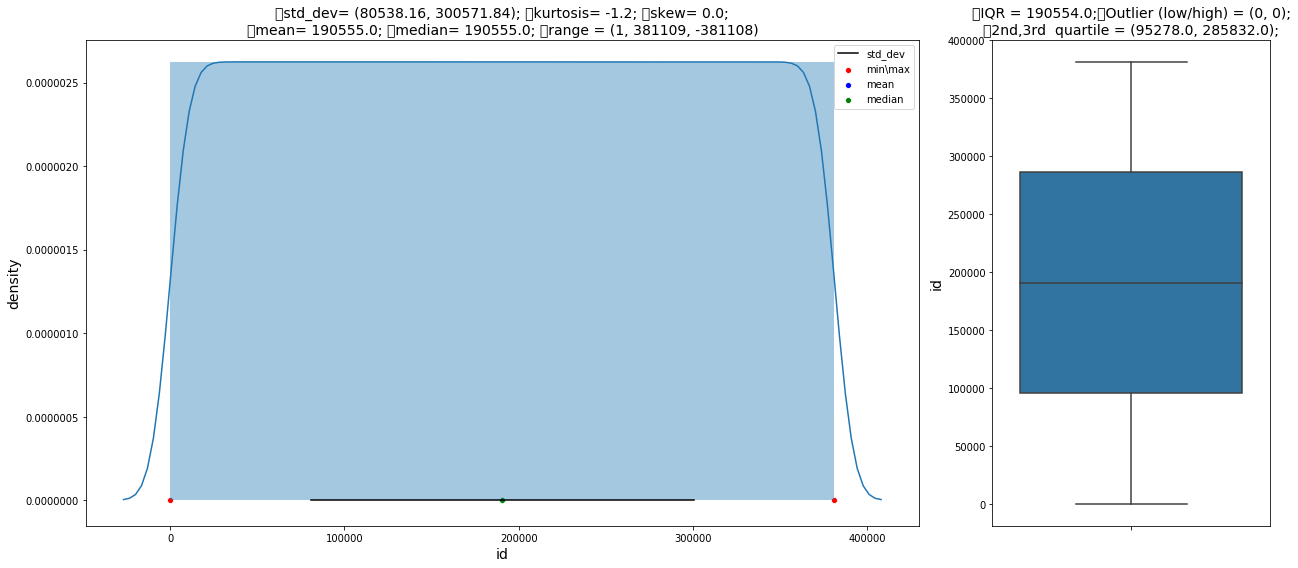

In [34]:
plot_num(train , "id")

* **Observation:**
* Number of unique ids is exactly equal to the number of rows we have in the train data.
* id is just a unique number given to each user.
* id will not be useful for our analysis and later for modeling. 

- Age

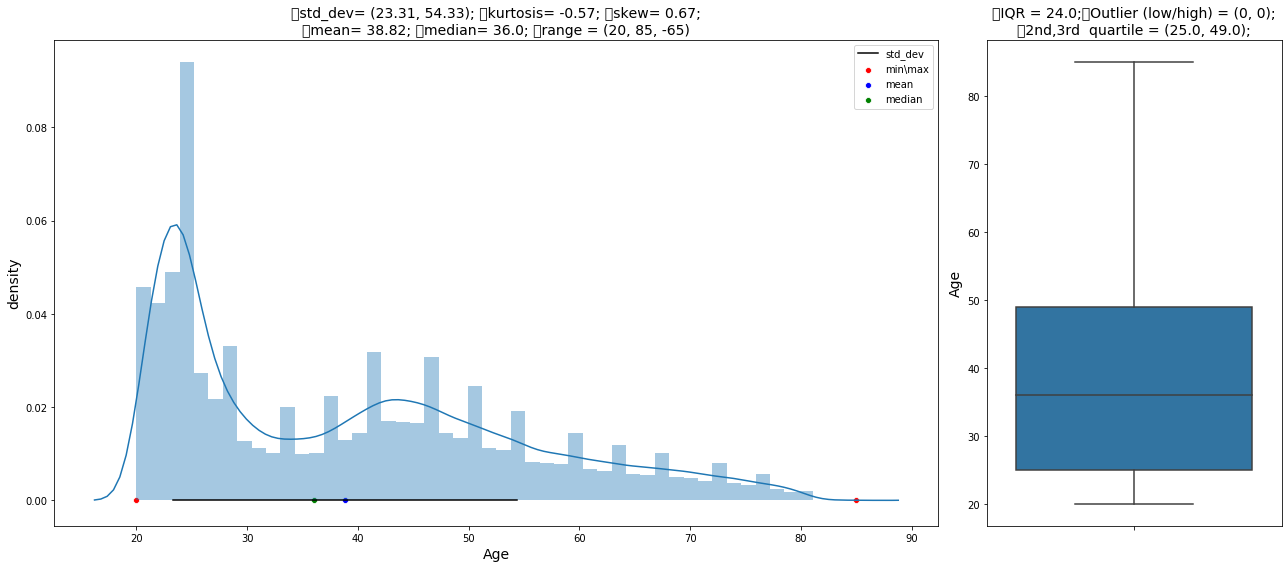

In [35]:
plot_num(train , "Age")

* **Observation**
- People from 20-30 tend to have the highest number of health insurance already , chances are they fell ill less as less age so accidents
>- Hypothesis - 20-30 might take insurance more
- Overall . 20- 50 have more health insurrance 
>- Hypothesis - They would take vehicle Insurance

### New_Feature 
- Make new Column for Age Binning to categorize people on Age basis.

In [36]:
train["Age"].min() , train["Age"].max()

(20, 85)

In [37]:
bins = [19 , 33 , 50 , 65 , 86]
labels = ["Young" , "Adult" , "Mature" , "Old"]
train["Age_Bin"] = pd.cut(train['Age'], bins, labels = labels, include_lowest = True)

In [39]:
#### Make for testing here
bins = [19 , 33 , 50 , 65 , 86]
labels = ["Young" , "Adult" , "Mature" , "Old"]
test["Age_Bin"] = pd.cut(test['Age'], bins, labels = labels, include_lowest = True)

#### Back to analysis

- Region_Code

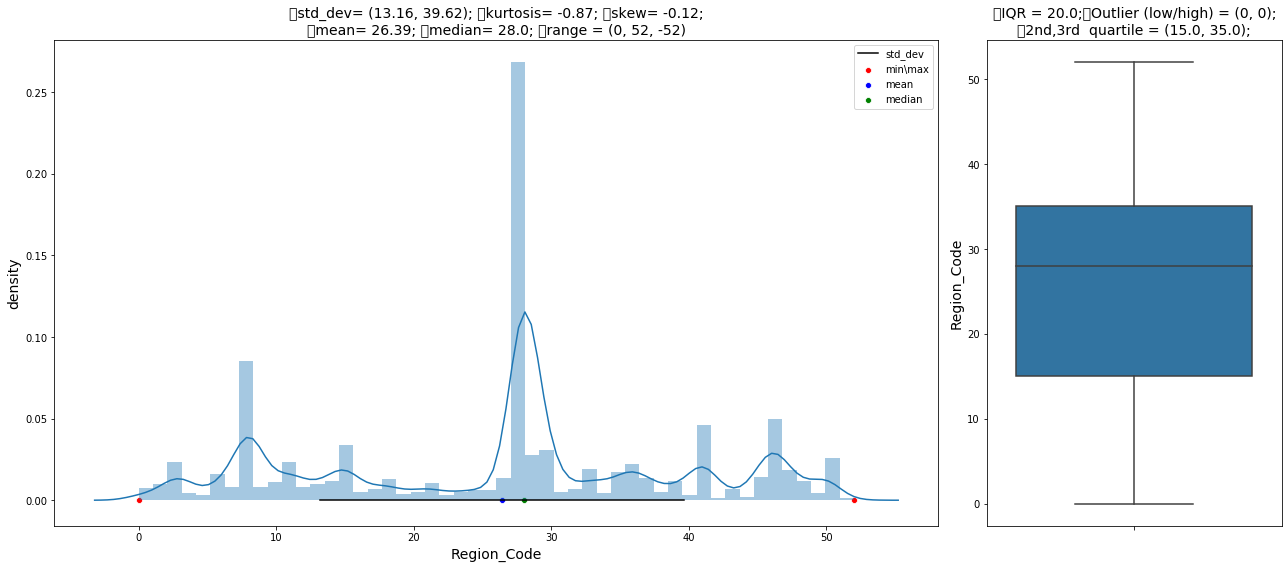

In [40]:
plot_num(train , "Region_Code")

 **Observation**
- Why more frequency near area 30?
>- More accidents?? Can be checked with Vehicle_Damage
>- If yes, Hypothesis -- More applied for vehicle insurance

- Annual_Premium (Annual Premium payment to be paid)

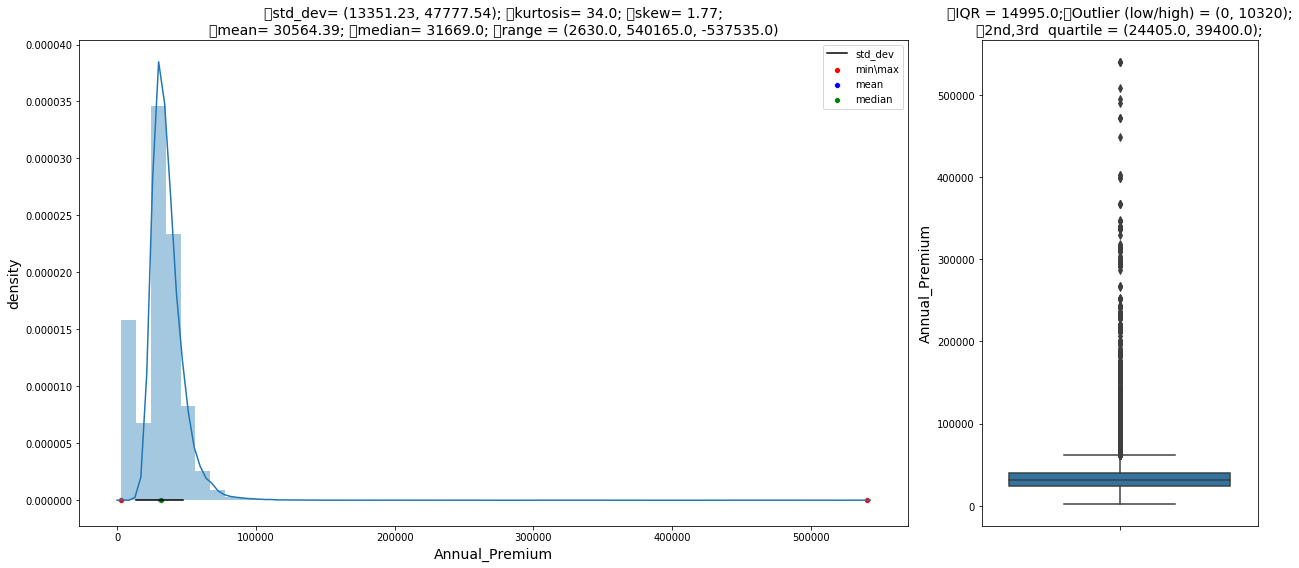

In [42]:
plot_num(train , "Annual_Premium")

**Observation**
* Graph for annual_premium is right skewed, Some customers have to pay very high amount.
* Majority of people have annual_premium between 1,3000-48,000.
* Lot of outliers present outside the higher wiskers of the boxplot and no ooutliers below lower whisker

**Hypothesis**
* Since less premium amount to be paid this year is majority
     * But do check with age in this and vehicle damage
* The high Insurance Payment ones
    * If very old , might not accept Vehicle Insurance 
    * If more vehicle damage, then would

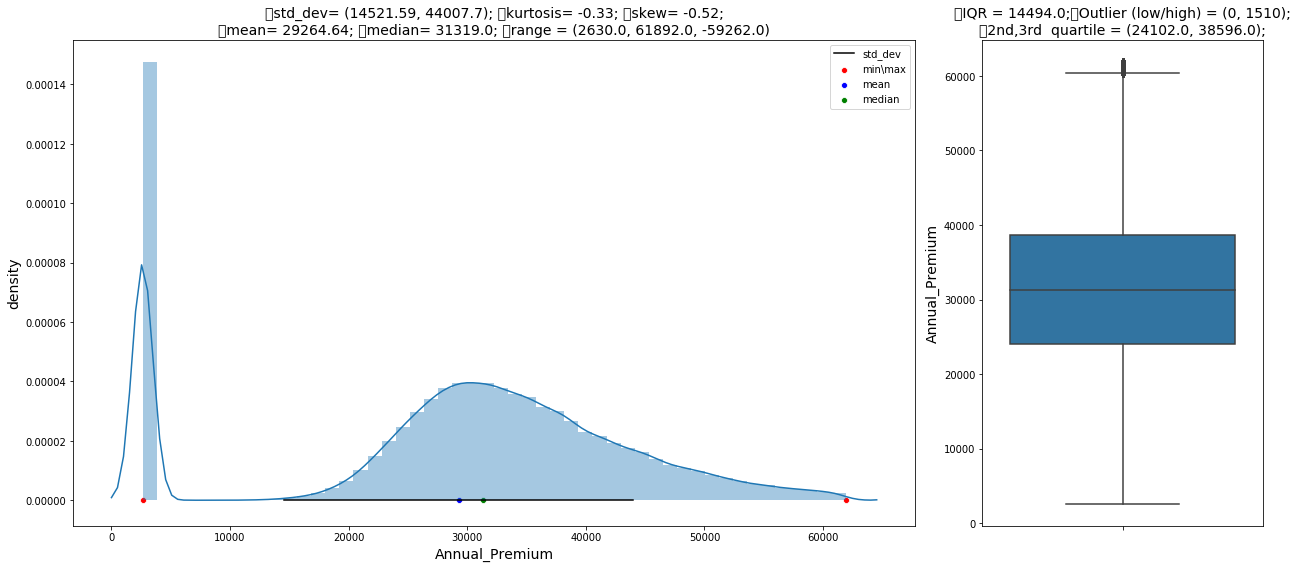

In [44]:
plot_num(train , "Annual_Premium" , False)

* **Observation**
    * The box plot is even after removing outliers
    * The kde plot has two peaks , one at the minimum value and other at near mean
* **Hypothesis**
    * Different annual premium for different vehicles ? (2-wheeler and 4-wheeler)
    * Check for Vehicle damage and age

- Policy_Sales_Channel (Anoymous Code for how the policy was introduced)
>- Different Agents, Over Mail, Over Phone, In Person, etc.

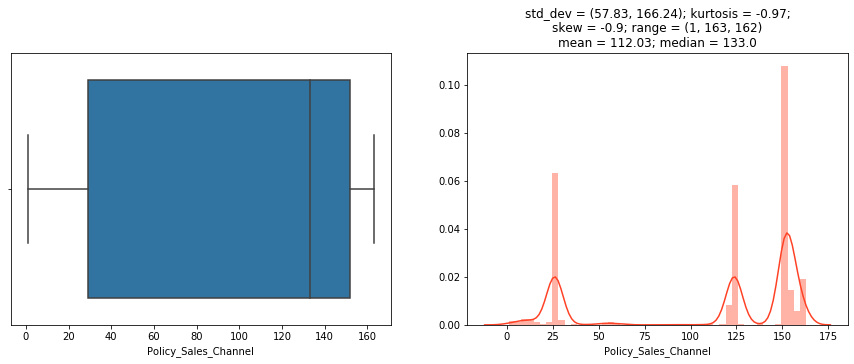

In [64]:
plot_num("Policy_Sales_Channel")

* **Observation**
     * The codes are definitely anoymous , but the ones with high peaks can be binned for over phone or mail or personally        or via agents and etc
     But Definitely increasin after 120 channel code. 
* **Hypothesis** -- More poeple interested who interacted with channel over 120

#### New Feature from Policy_Sales_Channel

In [77]:
bins = [0 , 20 , 35 , 70 , 120 , 145 , 165]
labels = ["Agents" , "Phone" , "agents" ,"Etc", "Mail" , "Personally"]
train["Policy_Sales_Channel_Bin"] = pd.cut(train['Policy_Sales_Channel'], bins=bins, labels = labels, include_lowest = True)

#### For testing

In [78]:
bins = [0 , 20 , 35 , 70 , 120 , 145 , 165]
labels = ["Agents" , "Phone" , "agents" ,"Etc", "Mail" , "Personally"]
test["Policy_Sales_Channel_Bin"] = pd.cut(test['Policy_Sales_Channel'], bins=bins, labels = labels, include_lowest = True)

#### Back to Analysis

- Vintage (Number of Days, Customer has been associated with the company)

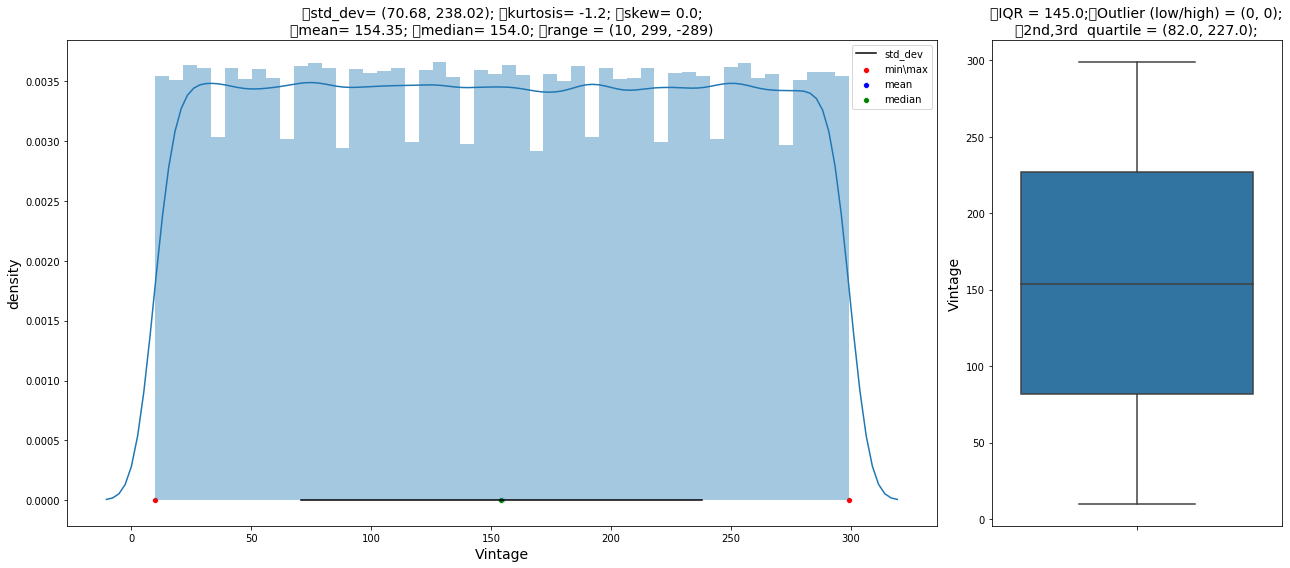

In [47]:
plot_num(train , "Vintage")

* **Observation**
    * There is a certain dip after a particular interval , so days can be divided in months to see if there is any pattern between them?
    * Otherwise Vintage feature is constant throughout

### New Feature

In [53]:
train.Vintage.min() , train.Vintage.max()

(10, 299)

In [55]:
bins = [1 , 31 , 59 , 90 , 120 , 151 , 181 , 212 , 243 , 273 , 304]
labels = [1 , 2 , 3, 4 , 5 , 6 , 7 ,8 ,9 , 10]
train["Vintage_Bin"] = pd.cut(train['Vintage'], bins, labels = labels, include_lowest = True)

In [56]:
### On testing data
bins = [1 , 31 , 59 , 90 , 120 , 151 , 181 , 212 , 243 , 273 , 304]
labels = [1 , 2 , 3, 4 , 5 , 6 , 7 ,8 ,9 , 10]
test["Vintage_Bin"] = pd.cut(test['Vintage'], bins, labels = labels, include_lowest = True)

In [61]:
train.Vintage_Bin = train.Vintage_Bin.astype("category")
test.Vintage_Bin = test.Vintage_Bin.astype("category")

### Univariate Categorical Variable

In [62]:
# Category traintypes
train.select_dtypes(include=['category']).dtypes

Gender                category
Driving_License       category
Previously_Insured    category
Vehicle_Age           category
Vehicle_Damage        category
Response              category
Age_Bin               category
Vintage_Bin           category
dtype: object

####  Defining function for Bar plot and getting value_counts for categories in columns

In [68]:
def plot_cat(data, column, rot=0):
    """
    Function to plot countplot and pie chart for categorical variables.
    
    """
    for j, i in enumerate(column):
        
        #plt.subplot(2,1, j+1)
        
        # Setting the figure size
        plt.figure(figsize=(10,3), dpi=100)
    
    
        # ploting the barplot
        plt.subplot(1,2,1)
        g=sns.countplot(x=i, data= data)
        plt.title('Barplot for {}'.format(i), fontsize=14)
        plt.xticks(rotation=rot)
        plt.tight_layout()
        
        #ploting the pie chart 
        plt.subplot(1,2,2)
        plt.axis('equal')
        plt.pie(x= data[i].value_counts(), labels= data[i].value_counts().index, autopct='%0.1f%%', shadow=True)
        plt.title('Pie chart for {}'.format(i), fontsize=14)
        plt.tight_layout()
        plt.show()

- Gender

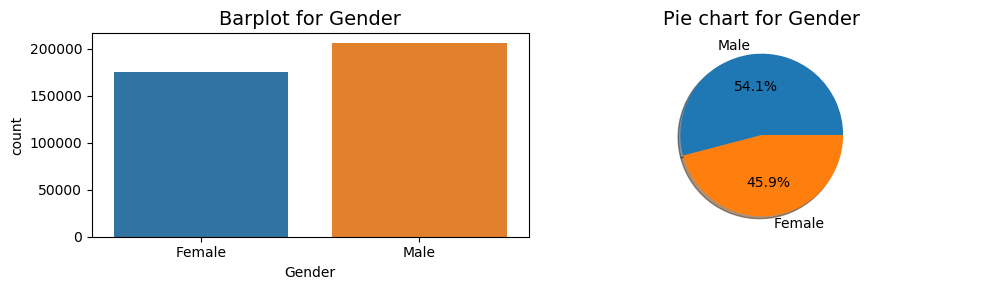

In [69]:
plot_cat(train, ["Gender"])

**Observation**
* Females are less in number what about during taking insurance?
    * Hypothesis - Females may accept more vehicle insurance due to more accidents 
    * How are females associated wrt license?

- Driving_License (0 : Customer does not have DL, 1 : Customer already has DL)

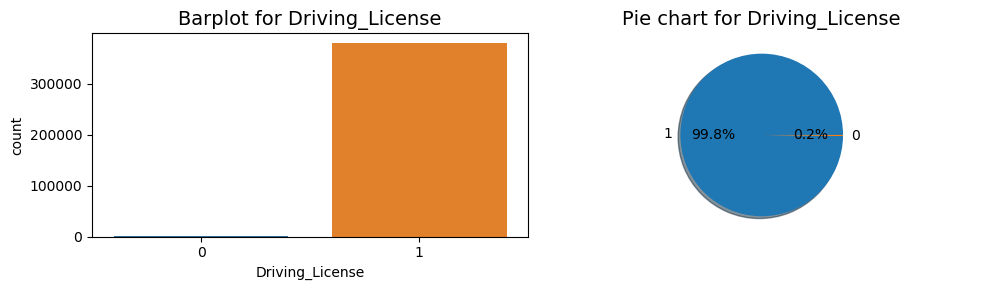

In [70]:
plot_cat(train , ["Driving_License"])

**Observation and Hypo**
* customers with no driving license are way too less
    * do they have new vehciles , so have no license?  

- Previously_Insured (1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have)

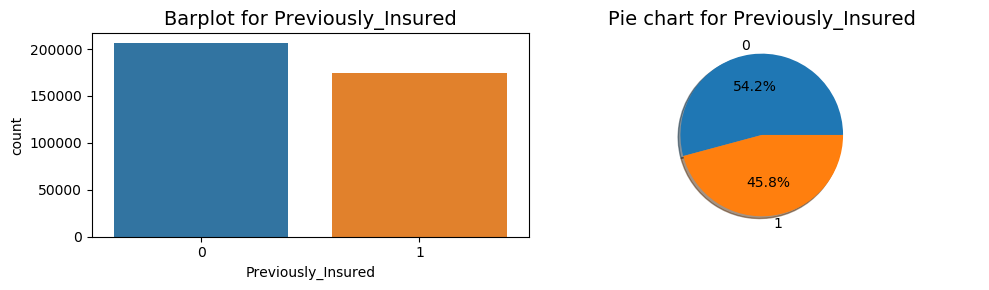

In [71]:
plot_cat(train , ["Previously_Insured"])

**Observation**
* 45% of them already have vehicle insurace previously 
* **Hypothesis** - Might agree faster with slowest mode of communication of policy for vehicle insurace
    * Depends on cehicle age here , if old vehicle and less damage then might not agree !!

- Vehicle_Age

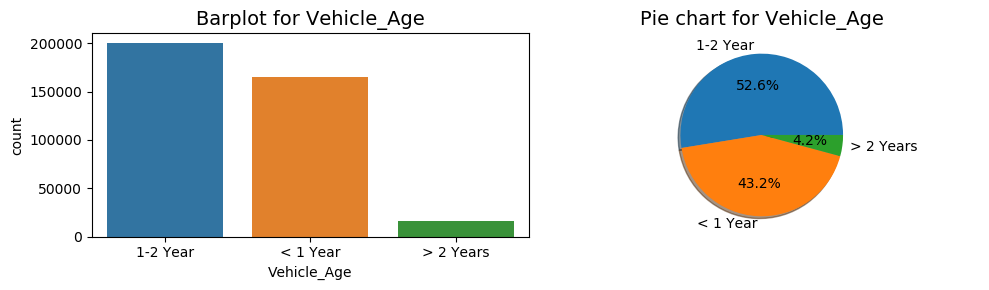

In [72]:
plot_cat(train , ["Vehicle_Age"])

**Observation**
* Newly brought vehicle ( < 1 year) might have insurance from company itself
     * hypothesis - wont agree for insurance
     * 1-2 years might agree faster because new vehicle and dont want to spend on damages

- Vehicle_Damage (1 : Customer got his/her vehicle damaged in the past. , 0 : Customer didn't get his/her vehicle damaged in the past.)

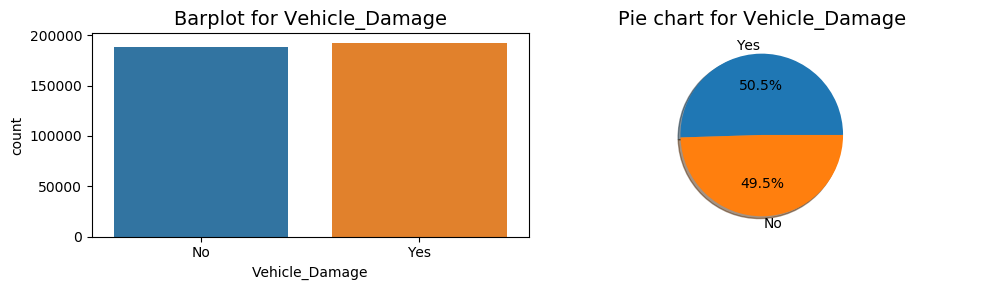

In [73]:
plot_cat(train , ["Vehicle_Damage"])

**Observation**
* Half of the customers have damaged vehicles
     * do check for Age of vehicle and damage ratio
     * Hypothesis - Damaged one would agree more

- Age_Bin

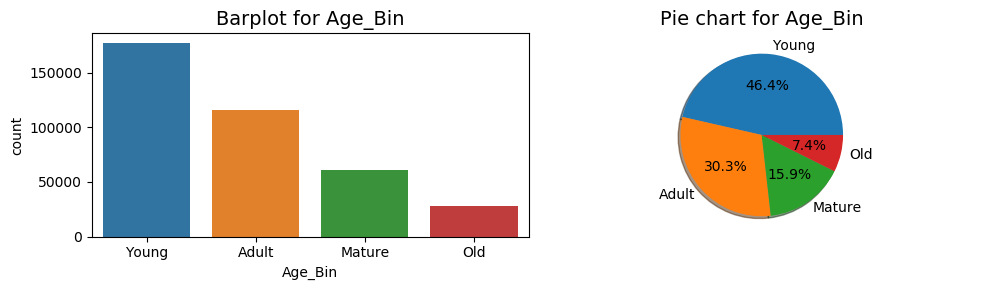

In [74]:
plot_cat(train , ["Age_Bin"])

**Observation**
* More Young customers , so might make more damage , so might agree for insurance

- Policy_Sales_Channel	(Anonymised Code for the channel of outreaching to the customer)

In [76]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Bin',
       'Vintage_Bin'],
      dtype='object')

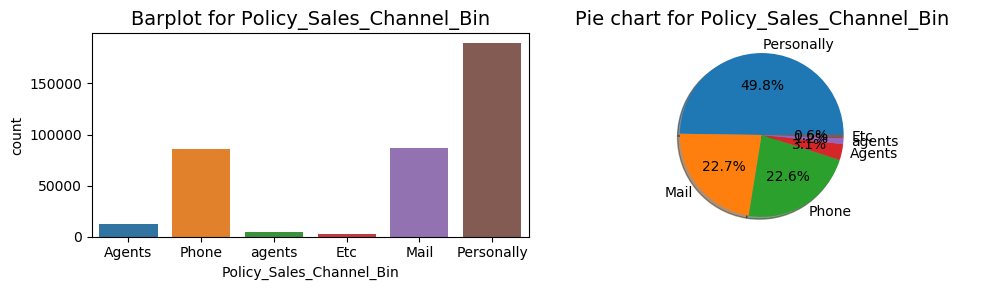

In [79]:
plot_cat(train , ["Policy_Sales_Channel_Bin"])

In [82]:
c= {"Agents":"Agents" , "agents":"Agents" , "Phone":"Phone" , "Mail":"Mail" , "Personally": "Personally" , "Etc" :"Etc"}
train['Policy_Sales_Channel_Bin'] = train['Policy_Sales_Channel_Bin'].map(c)

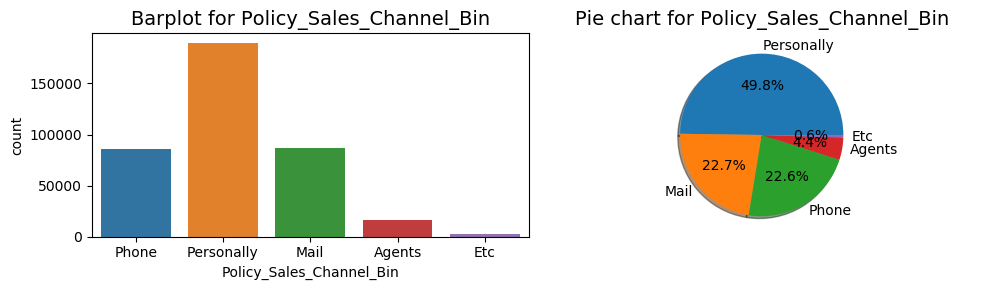

In [83]:
plot_cat(train , ["Policy_Sales_Channel_Bin"])

* **Observation**
    * Personally would result better in getting pople interested for insurance
* **Hypothesis**
    * Difference between Phone and mail signficant ?

- Response (1 :  Customer is interested, 0 : Customer is not interested)

* Vintage_Bin (the days the customer is associated with bank)

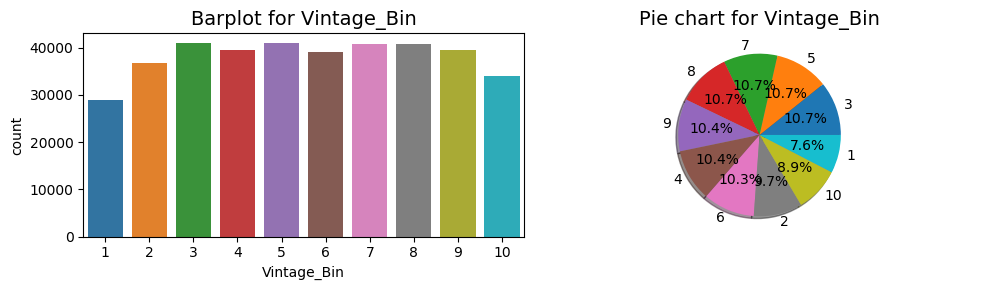

In [84]:
plot_cat(train , ["Vintage_Bin"])

**Observation**
    * The first and last moonth have the least percentage of customers
    * Maybe customers are thinking for whether to renew the policy or not?
* **Hypothesis**
    * Are the difference between all the months significant?

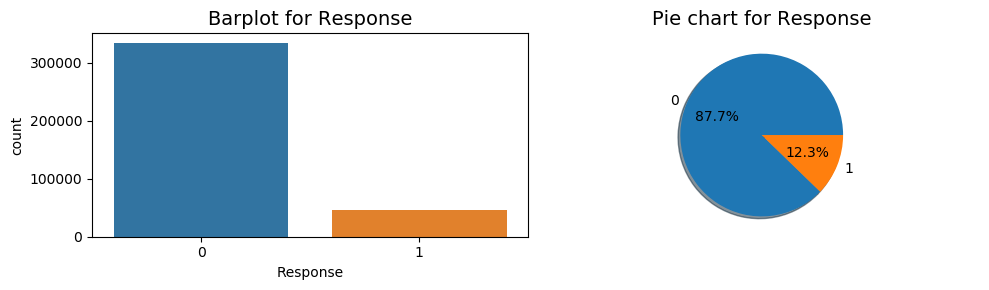

In [85]:
plot_cat(train , ["Response"])

**Observation**
- Only 12 % are interested/agreed for vehicle insurance 

## Bivariate

- Numerical - Numerical
- Numerical - categorical
- Categorical - Categorical

#### Bivariate (Numerical-Categorical)

 **Hypothesis to check from univariate**

* Age
     * 20-30 might take insurance more
     * 30-50 would take vehicle Insurance 

* Region_Code
     * more near 30
     * More accidents?? Can be checked with Vehicle_Damage
     * If yes, Hypothesis -- More applied for vehicle insurance

* Annual_Premium
    * Since less premium amount to be paid this year is majority
    * Which age group pays more , might tell about vehicle type ?
    * Different annual premium for different vehicles ? (2-wheeler and 4-wheeler) , check for damage?

*  Policy_Sales_Channel
    * Hypothesis - More poeple interested who interacted with channel over 120
*  Vintage                   
    * There is a certain dip after a particular interval , any explanation for response ?

#### Defining Function with t and z test results

In [91]:
# function to operate 2-sample z test
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt((sigma1**2/N1)+(sigma2**2/N2))
    z = (X1-X2)/ovr_sigma
    pval = 2*(1- norm.cdf(abs(z)))
    return pval

In [92]:
# function to preform 2-sample t-test
def TwoSampT(x1, x2, sd1, sd2, n1, n2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dst
    over_sd = sqrt(((sd1**2/n1) + (sd2**2/n2)))
    t = (x1-x2)/over_sd
    df = n1+n2-2
    pval = 2*(1-t_dst.cdf(abs(t),df))
    return pval

In [93]:
def BVA_Cont_Cat(data, cont, cat, stat_test=False):
    
    """
    """
    
    # Perform a t-test z-test if condition is true
    if stat_test == True:
        
        # giving category as 1
        category = 1
        
        # creating 2 samples
        x1 = data[cont][data[cat]==category][:]
        x2 = data[cont][~(data[cat]==category)][:]
        
        # calculating descriptive statistics 
        n1, n2 = x1.shape[0], x2.shape[0]
        m1, m2 = x1.mean(), x2.mean()
        std1, std2 = x1.std(), x2.std()
        
        # calculating p-values
        t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
        z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
    
    #Setting the figure size
    plt.figure(figsize=(18,7))
    
    #Ploting barplot between cont. var and target
    plt.subplot(1,2,1)
    g = sns.barplot(x=cat, y=cont, data=data, ci=False, palette='Set2')
    
    if stat_test == True:
        plt.title('Barplot for {} and Response\n\tt-test p-value = {} \tz-test p-value = {}'.format(cont,t_p_val, z_p_val), fontsize=16)
    
    else:
        plt.title('Barplot for {} and Response'.format(cont), fontsize=16)
    
    plt.xlabel('{}'.format(cat),fontsize=12)
    plt.ylabel('{}'.format(cont),fontsize=12)
    for i in g.patches:
            g.annotate(s='{:.0f}'.format(i.get_height()), xy=(i.get_x()+0.3, i.get_height()+1))
    
    #Ploting stripplot between cont var and target 
    plt.subplot(1,2,2)
    sns.stripplot(x=cat, y=cont, data=data, palette='Set2')
    plt.title('Stripplot for {} and Response'.format(cont), fontsize=16)
    plt.xlabel('{}'.format(cat),fontsize=12)
    plt.ylabel('{}'.format(cont),fontsize=12)
    plt.tight_layout()

In [94]:
# Numerical traintypes
train.select_dtypes(include=['int64','float64','Int64']).dtypes

id                        int64
Age                       int64
Region_Code               int64
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
dtype: object

**1. Age**
    * Points to investigate
    * 20-30 might take insurance more
    * 30-50 would take vehicle Insurance

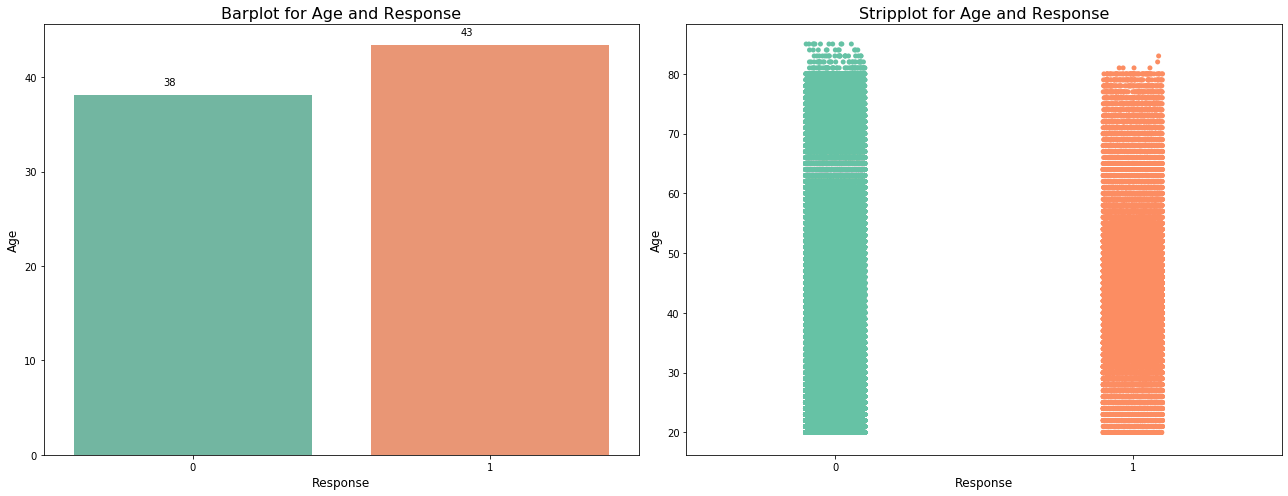

In [95]:
BVA_Cont_Cat(train, 'Age', 'Response')

* Observation
    * Average age in accepting insurance is 43 so hypothesis for 30-50 might accept mor is accepted.
    * **New Hypo**
    * Do these oldies have 4 wheeler?
    * Strip plot helps in explaining that very old over 70 are not interested in taking insurance

**2. Region_Code**
    * Points to check
    * more frequency of customers in area near 30
    * Hypothesis -- More applied for vehicle insurance?

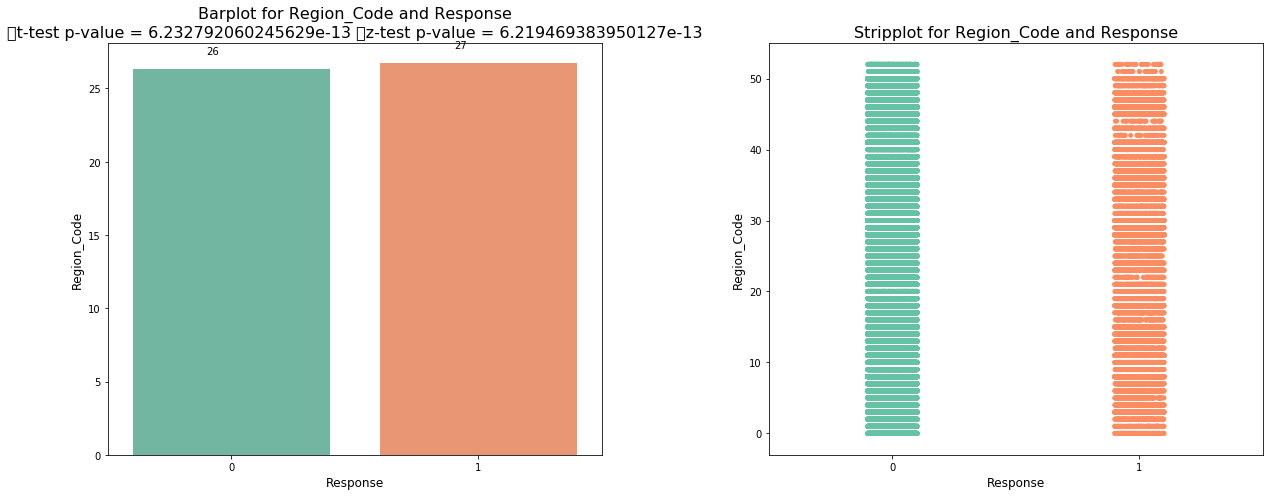

In [101]:
BVA_Cont_Cat(train, 'Region_Code', 'Response' , stat_test=True)

**Observation**
    * Average area code for no rsponse and yes response is almost similar , probably this can be better checked as categorical variable for better understanding of areas.
    * Change is significant enough between different avg values of no and yes resposne**

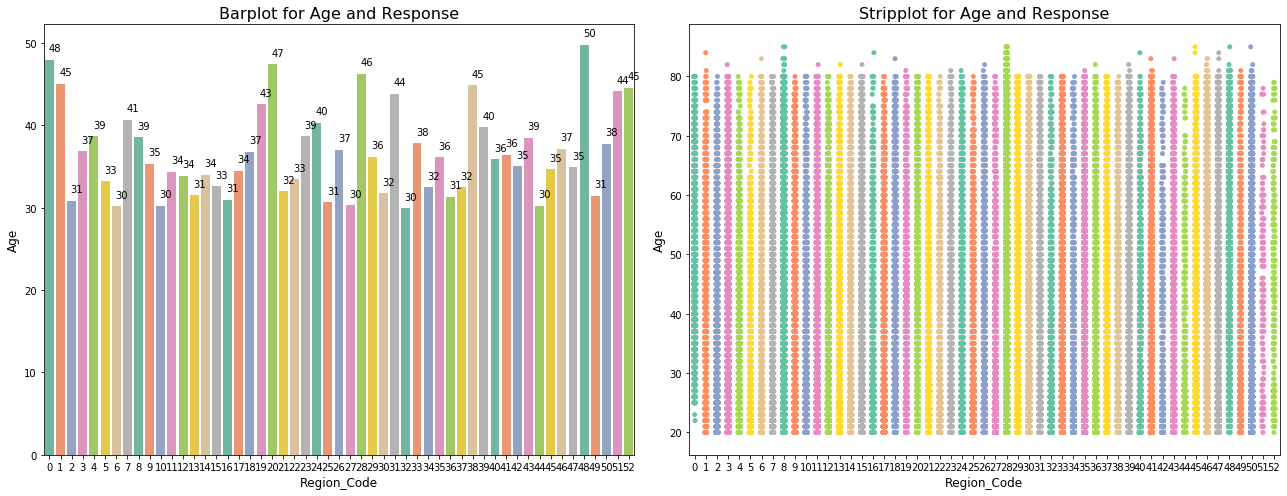

In [97]:
BVA_Cont_Cat(train, 'Age', 'Region_Code')

**Observation**
    * No Outlier in area near 25-30 but ighst at 28 area
    * we have few outliers in areas , so might explain the peaks too , 
    * other than outliers , the trend is almost similar 
    * High around 28 , 8 ,38, 48  and breaks means least for 50 above region_code

**3.Annual_Premium**

    * Since less premium amount to be paid this year is majority
    * Which age group pays more , might tell about vehicle type ?
    * Different annual premium for different vehicles ? (2-wheeler and 4-wheeler) , check for damage?

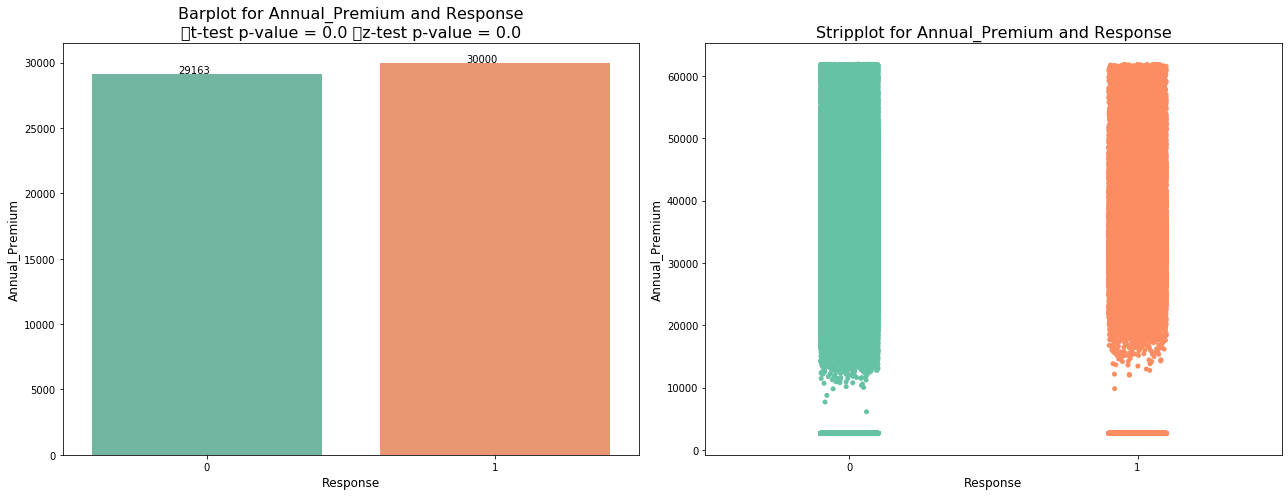

In [110]:
BVA_Cont_Cat(train, 'Annual_Premium', 'Response', stat_test=True)

In [109]:
train.Annual_Premium.min()

2630.0

**Observation**
    * The Difference between averages of two response classes are very less , but t testand z test results show that they are significant
    
    * Also the averages are low in mangitude , near to the mean of the annual_premium
    * Not many have agrees for low annual_premium ones (strip_plot)
    * may be two wheelers donot agree for theese?
    * as the annual_premium ahve increased , people agreed more , probably because expensive vehicle so mmore anuual_premium and so accepted insurance?
    * what about the vehicle_age of such vehicles? the higher premium ones?

**4. Policy_Sales_Channel**

    * Hypothesis - More poeple interested who interacted with channel over 120

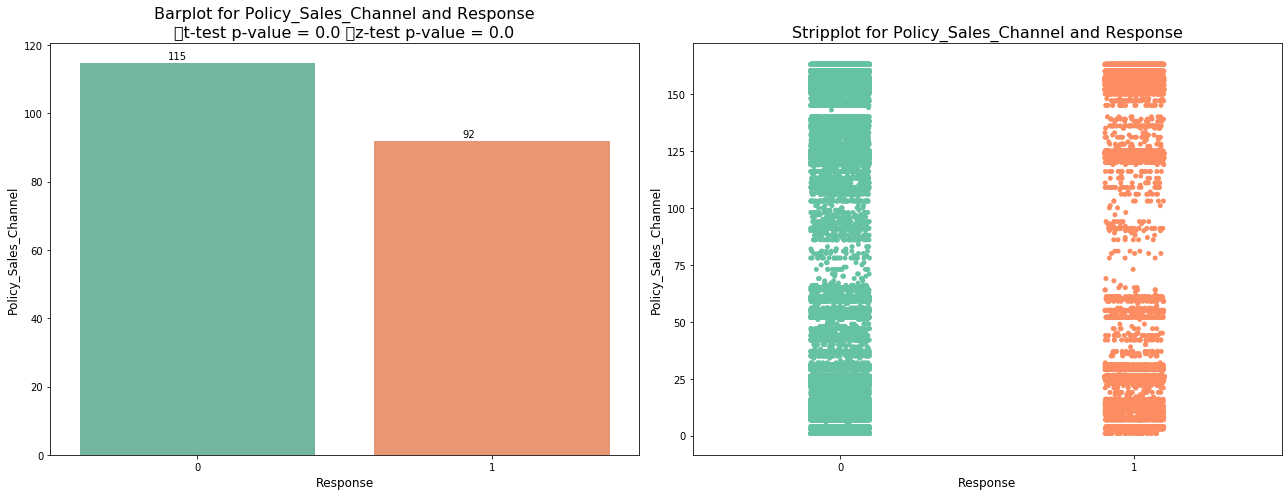

In [112]:
BVA_Cont_Cat(train, 'Policy_Sales_Channel', 'Response' , stat_test=True)

**Observation**
    * Average for not accepting is huge , so higher channel code might result more in no response (evident from strip_plot too)
    * (From Strip_plot) Low channel code results in better acceptance of insurance.


**5. Vinatge**
    * To check : sudden drop after particular intervals 
        

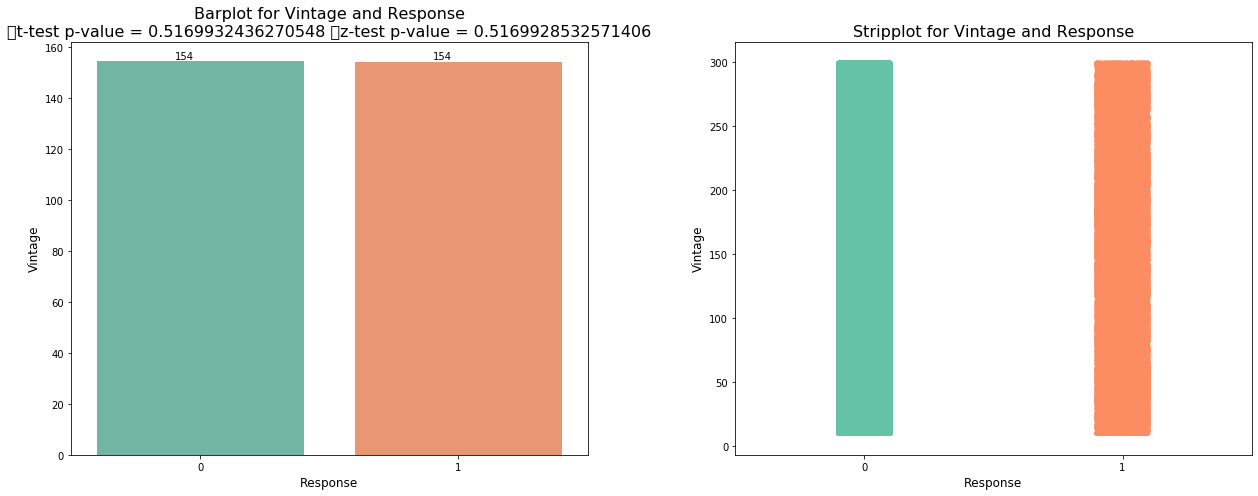

In [113]:
BVA_Cont_Cat(train, 'Vintage', 'Response' , stat_test=True)

**Observation**
    * Since the Vinatge feature was uniform throughout so , explains the similar average and also p values resulting the same.

## Bivariate (Cat-Cat)

In [133]:
def BVA_cat_cat(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False
    
    plt.figure(figsize=(18, 6))

    #plotting grouped plot
    plt.subplot(1,2,1)
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

    #plotting percent stacked bar plot
    #sns.catplot(ax, kind='stacked')
    plt.subplot(1,2,2)
    g = (data.groupby(cat)[tar].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked='True')
    for i in g.patches:
        g.annotate(s='{:.0f}'.format(i.get_height()), xy=(i.get_x()+0.2, i.get_height()+1))
    int_level = data[cat].value_counts()

In [115]:
# Numerical traintypes
train.select_dtypes(include=['category']).dtypes

Gender                category
Driving_License       category
Previously_Insured    category
Vehicle_Age           category
Vehicle_Damage        category
Response              category
Age_Bin               category
Vintage_Bin           category
dtype: object

**6. Gender**
    * Points to check
    * Females are less in number what about during taking insurance?
    * Hypothesis - Females may accept more vehicle insurance due to more accidents
    * How are females associated wrt license?


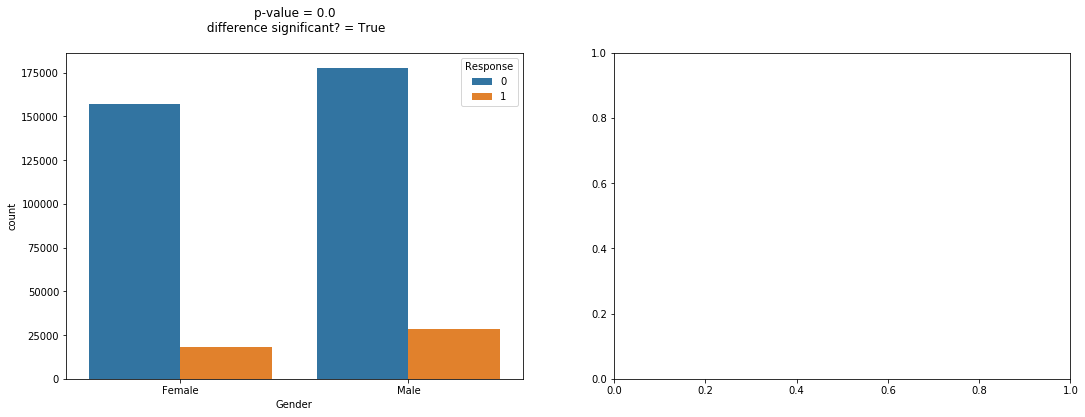

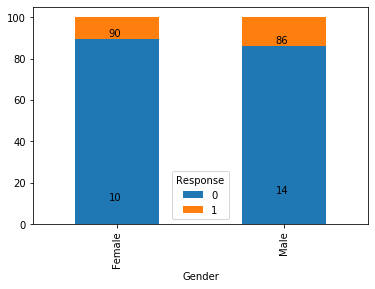

In [134]:
BVA_cat_cat(train , "Response" , "Gender") 

**Observation**
    * Even if males are more in number and also take more insurance 
    * is it because males own four wheelers?
    * IS it because majority of males have more license?

**7. Driving_License**

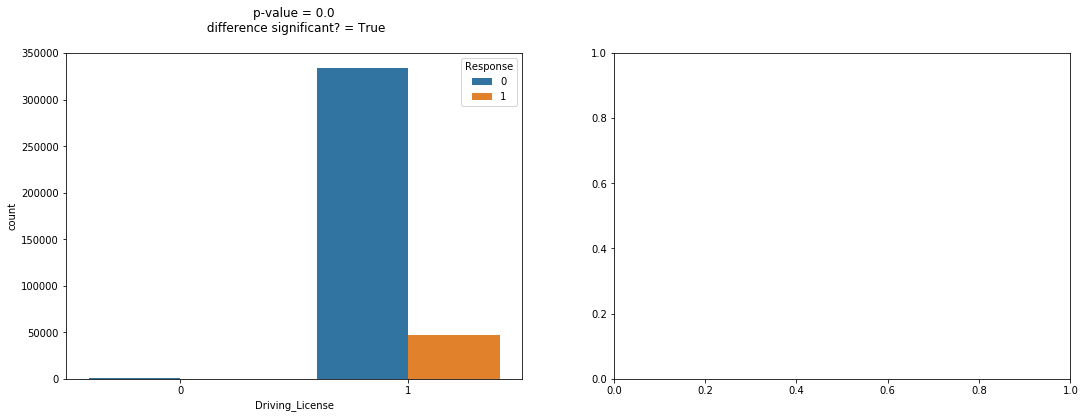

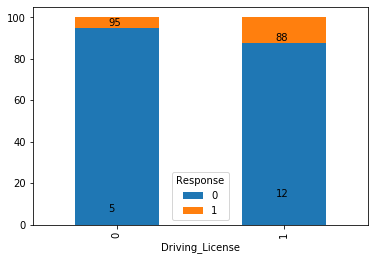

In [136]:
BVA_cat_cat(train , "Response" , "Driving_License")

**Observation**
    * Only 12 percent have accpeted the insurance !! 
    * 5 percent oout of 2 percent no license data is still taing insurance why?
    * 12 percent have more heavy vehicle or less accdient ?

**8. Previously_Insured**
    * points to check
    * 45% of them already have vehicle insurace previously
    * Hypothesis - Might agree faster with slowest mode of communication of policy for vehicle insurace
    * Depends on vehicle age here , if old vehicle and less damage then might not agree !!


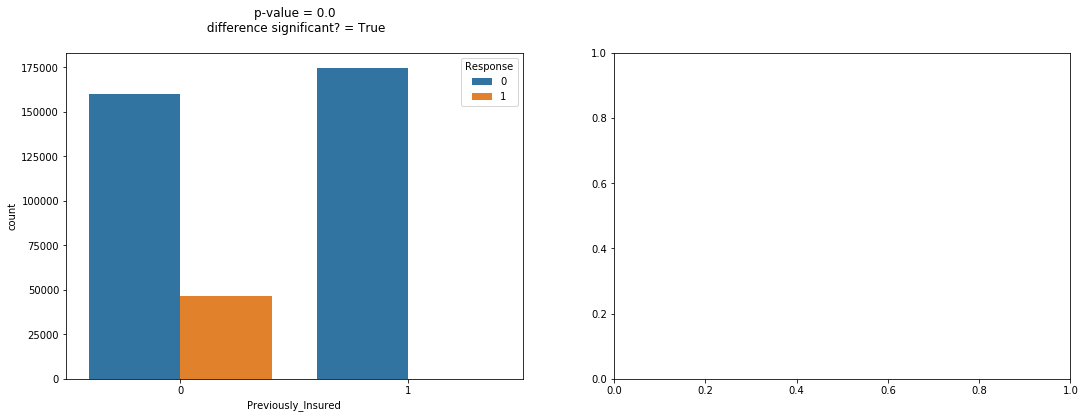

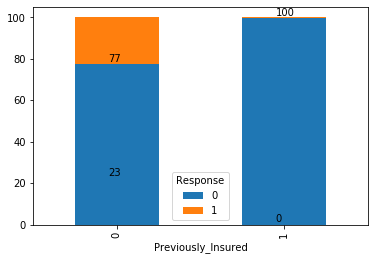

In [138]:
BVA_cat_cat(train , "Response" , "Previously_Insured")

**Observation**
    * Accepted Hypothesis
    * Who already had insurance before , didnot agree for new
    * More than 55 percent didnot have previous insurance and 23 percent agreed to take.
    * Are they the ones with New vehicles r vehicles a=with less than 2 years vehcle age?

**9. Vehicle_Age**
    * Points to check
    * Newly brought vehicle ( < 1 year) might have insurance from company itself
    * hypothesis - wont agree for insurance
    * 1-2 years might agree faster because new vehicle and dont want to spend on damages



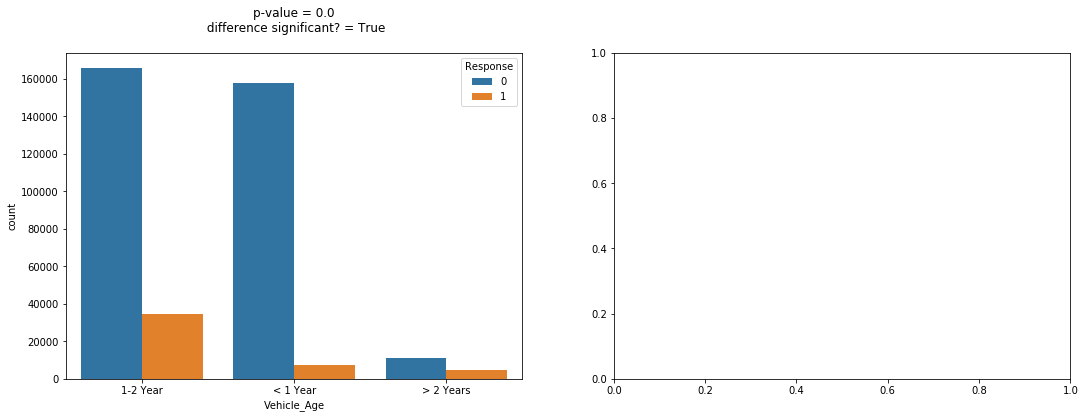

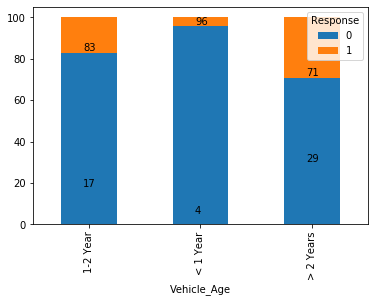

In [140]:
BVA_cat_cat(train , "Response" , "Vehicle_Age")

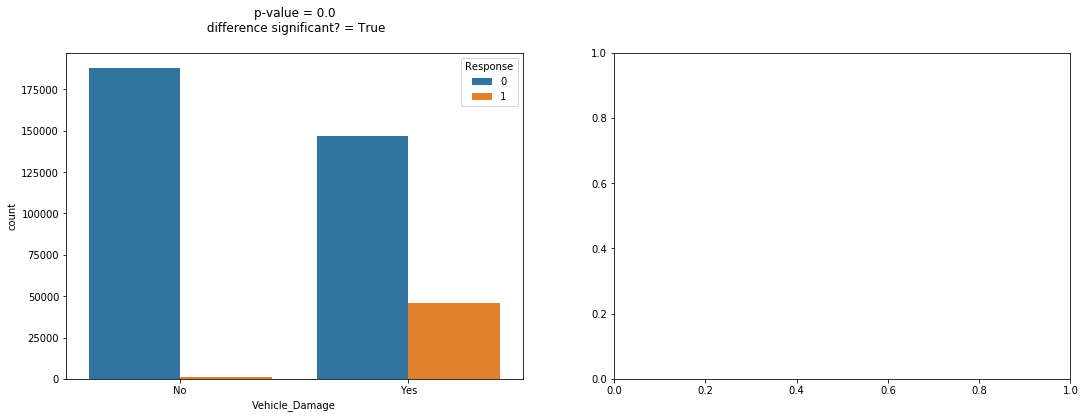

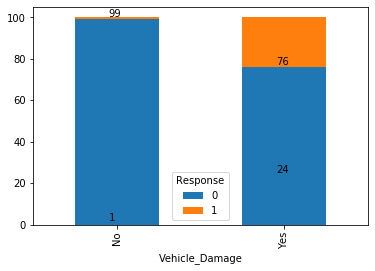

In [141]:
BVA_cat_cat(train , "Response" , "Vehicle_Damage") 

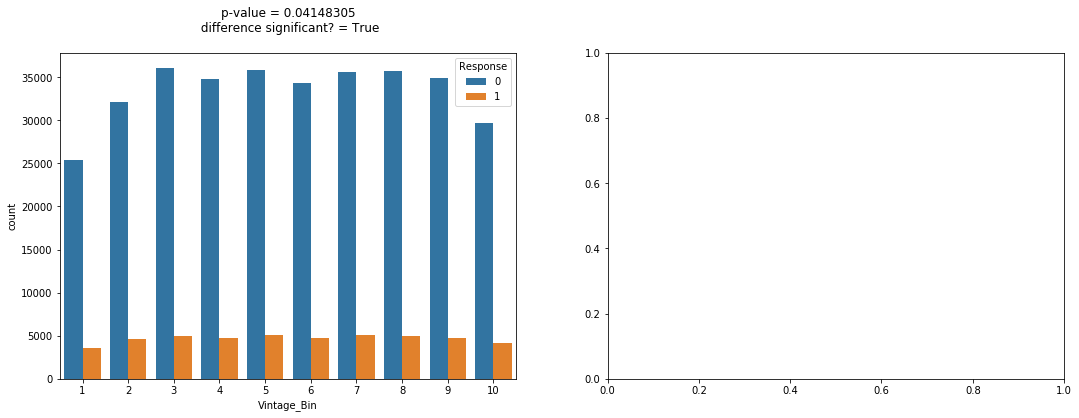

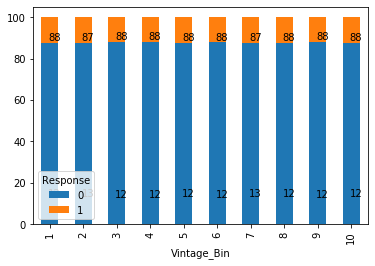

In [142]:
BVA_cat_cat(train , "Response" , "Vintage_Bin")